In [6]:
import time
import numpy as np
import math
import random
from matplotlib import pyplot as plt
from google.colab import files
import scipy.optimize as opt
plt.rcParams.update({'font.size': 18})

In [ ]:
def f1(x):
    return np.power (x, 3)

def f2(x):
    return np.abs (x - 0.2)

def f3 (x):
    return np.multiply(x, np.sin(1/x))

In [ ]:
#exaustive search algorithm
def exhaustive_search(func, limits, eps):
    a, b = limits
    n = int((b - a) / eps)
    iteration = 0
    evaluation = 0

    min_y = float("inf")
    min_x = 0
    
    for k in range(n+1):
        iteration += 1 # iter up
        x = a + k * (b - a) / n
        evaluation += 1
        y = func( x ) # eval up
        
        if y < min_y:
            min_y = y
            min_x = x
        
    return min_x, min_y, iteration, evaluation

#dichotomy algorythm 
def dichotomy(func, limits, eps):
    a, b = limits
    delta = eps / 2
    
    iteration = 0
    evaluation = 0

    while abs(a - b) >= eps:
        
        iteration += 1
        evaluation += 2
        
        median = (a + b) / 2
        x1, x2 = median - delta / 2, median + delta / 2
        
        f1, f2 = func( x1 ), func( x2 )
        
        if f1 <= f2:
            b = x2
        else:
            a = x1
           
    min_x = (a + b) / 2
    min_y = (f1 + f2) / 2
        
    return min_x, min_y, iteration, evaluation

#golden section algorithm
def golden_section(func, limits, eps):
    a, b = limits
    
    flag = 0
    
    iteration = 0
    evaluation = 0
    
    while abs(a - b) >= eps:
        iteration += 1
        
        delta = (3 - math.sqrt(5)) * (b - a) / 2
        
        if flag == 0:
            evaluation += 2
            x1, x2 = a + delta, b - delta
            f1, f2 = func( x1 ), func( x2 )
        if flag == "x2=x1":
            evaluation += 1
            x1, x2 = a + delta, x1
            f1, f2 = func( x1 ), f1
        if flag == "x1=x2":
            evaluation += 1
            x1, x2 = x2, b - delta
            f1, f2 = f2, func( x2 )

        if f1 <= f2:
            b = x2
            flag = 'x2=x1'
        else:
            a = x1
            flag = 'x1=x2'
           
    min_x = (a + b) / 2
    min_y = (f1 + f2)  / 2
    
    return min_x, min_y, iteration, evaluation

In [ ]:
#exhaustive search results
print(exhaustive_search (f1, (0,1), 0.001))
print(exhaustive_search (f2, (0,1), 0.001))
print(exhaustive_search (f3, (0.01,1), 0.001))

#dichotomy results
print(dichotomy (f1, (0,1), 0.001))
print(dichotomy (f2, (0,1), 0.001))
print(dichotomy (f3, (0.01,1), 0.001))

#golden section results
print(golden_section (f1, (0,1), 0.001))
print(golden_section (f2, (0,1), 0.001))
print(golden_section (f3, (0.01,1), 0.001))

(0.0, 0.0, 1001, 1001)
(0.2, 0.0, 1001, 1001)
(0.223, -0.21722461258083445, 991, 991)
(0.0004940185546875001, 5.403898672520883e-10, 11, 22)
(0.20010119628906245, 0.0002500000000000002, 11, 22)
(0.22259631347656245, -0.21722919262931228, 11, 22)
(0.000366568717928702, 2.435390168572885e-10, 15, 16)
(0.2000733137435857, 0.000153238183306717, 15, 16)
(0.22271959361960325, -0.21723265287228982, 15, 16)


In [3]:
#alpha and beta float variables generating (0,1)
random.seed(111)
np.random.seed(111)
alpha = random.random()
beta = random.random()
x_k = []
y_k = []
delta_k = []

#x_k array generating
for k in range (101):
    x_k.append(k/100)
x_k = np.array(x_k)
#delta_k array generating
delta_k = np.random.normal(0,1,101)
delta_k = np.array(delta_k)
#y_k array generating
y_k = alpha * x_k + beta + delta_k
y_k = np.array(y_k)

print(alpha, beta)

0.827170565342314 0.21276311517617263


[1.00282701 0.11424023]
[1.00279628 0.11425578]
[1.00335858 0.11390432]


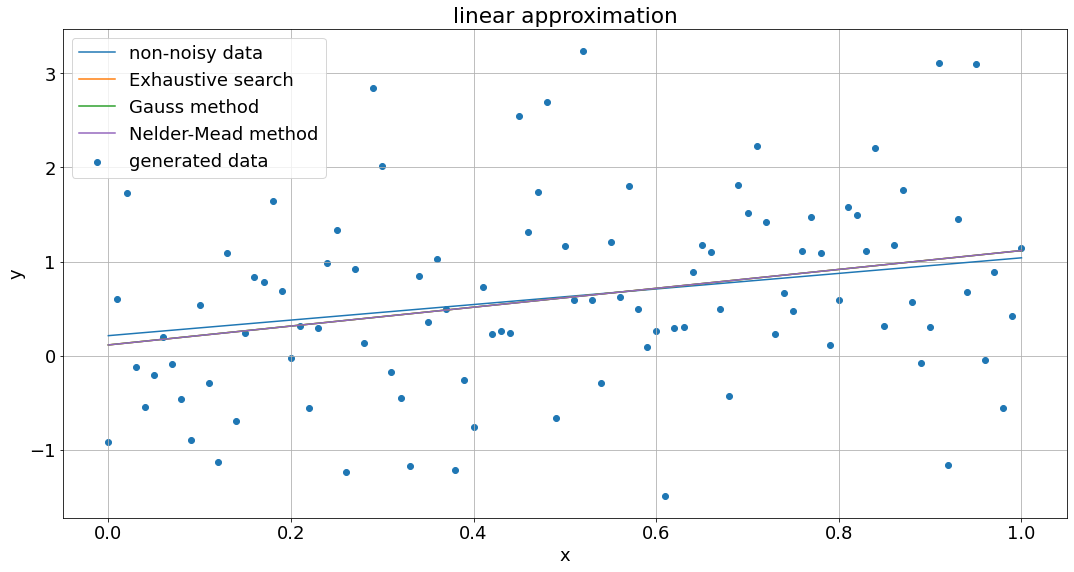

In [14]:
#linear approximation

#functions for optimizations
def linear(x, a, b): #F(x_k, a, b)
    return a * x + b

def least_squares(params): #D(a, b)
    a, b = params
    global x_k, y_k
    global linear
    return np.sum((linear(x_k, a, b) - y_k)**2)

initial_guess = [0, 0]


#exhaustive search
a0 = opt.brute(least_squares, ([0,1],[0,1]),  Ns = 1 / 0.001)

#Gauss method
a1 = opt.minimize(least_squares, initial_guess, method='Powell', tol = 0.001)

#Nelder-Mead method
a2 = opt.minimize(least_squares, initial_guess, method='Nelder-Mead', tol = 0.001)

print(a0)
print(a1['x'])
print(a2['x'])

#plotting the results
plt.figure(figsize=(18, 9))
plt.scatter(x_k, y_k, label='generated data')
plt.plot(x_k, alpha * x_k + beta, label='non-noisy data', color='tab:blue')
plt.plot(x_k, a0[0] * x_k + a0[1], label='Exhaustive search', color='tab:orange')
plt.plot(x_k, a1['x'][0] * x_k + a1['x'][1], label='Gauss method', color = 'tab:green')
plt.plot(x_k, a2['x'][0] * x_k + a2['x'][1], label='Nelder-Mead method', color = 'tab:purple')
plt.title("linear approximation")
plt.ylabel("y")
plt.xlabel("x")
plt.legend()
plt.grid(True)
plt.savefig('1.png')
plt.show()
#files.download("1.png")

[ 0.39018134 -0.6507399 ]
[ 0.3908536  -0.65041234]
[ 0.39015401 -0.65089322]


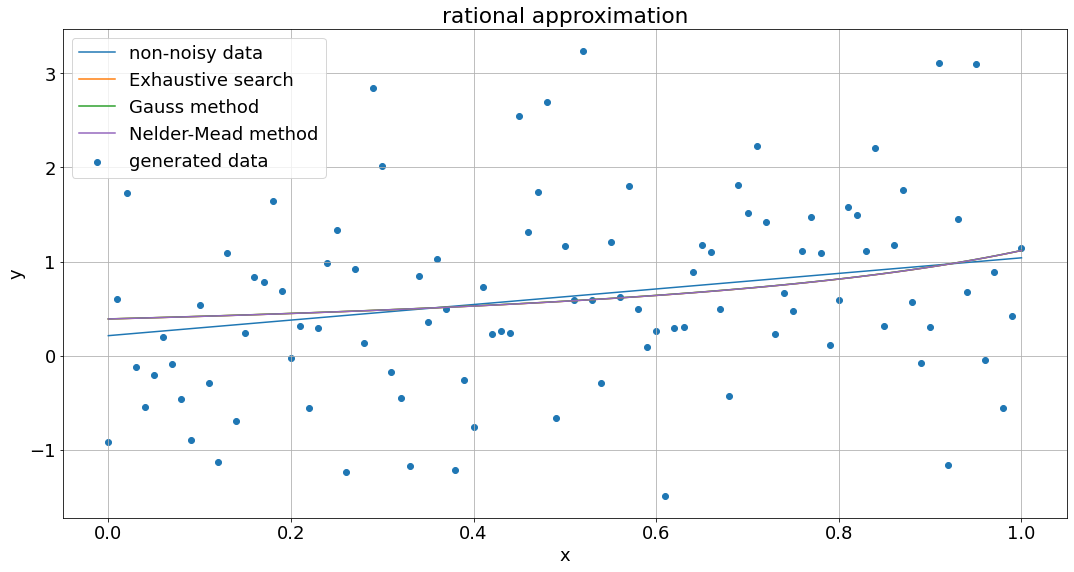

In [15]:
#rational approximation

#functions for optimizations
def rational(x, a, b): #F(x_k, a, b)
    return a / (1 + b * x)

def least_squares2(params): #D(a, b)
    a, b = params
    global x_k, y_k
    global rational
    return np.sum((rational(x_k, a, b) - y_k)**2)

initial_guess = [1, 1]


#exhaustive search
a0 = opt.brute(least_squares2, ([0,1],[0,1]),  Ns = 1 / 0.001)

#Gauss method
a1 = opt.minimize(least_squares2, initial_guess, method='Powell', tol = 0.001)

#Nelder-Mead method
a2 = opt.minimize(least_squares2, initial_guess, method='Nelder-Mead', tol = 0.001)

print(a0)
print(a1['x'])
print(a2['x'])

#plotting the results
plt.figure(figsize=(18, 9))
plt.scatter(x_k, y_k, label='generated data')
plt.plot(x_k, alpha * x_k + beta, label='non-noisy data', color='tab:blue')
plt.plot(x_k, a0[0] / (1 + x_k * a0[1]) , label='Exhaustive search', color='tab:orange')
plt.plot(x_k, a1['x'][0] / (1 + x_k * a1['x'][1]), label='Gauss method', color = 'tab:green')
plt.plot(x_k, a2['x'][0] / (1 + x_k * a2['x'][1]), label='Nelder-Mead method', color = 'tab:purple')
plt.title("rational approximation")
plt.ylabel("y")
plt.xlabel("x")
plt.legend()
plt.grid(True)
plt.savefig('2.png')
plt.show()
#files.download("2.png")